# Caracterização de redes complexas

Bibliotecas úteis:

In [ ]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Leitura dos arquivos das redes:


*   lesmis: Livro "Os Miseráveis"
*   powergrid: Rede de energia elétrica dos EUA
*   euroroad: Estradas da Europa
*   usairport: Aeroportos dos EUA



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving powergrid.txt to powergrid.txt


# Base de dados: lesmis

In [ ]:
lesmis = nx.read_gml("/content/lesmis.gml") 

In [ ]:
lesmis

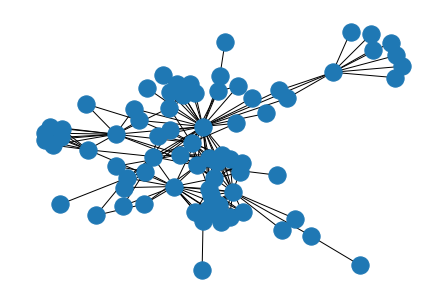

In [ ]:
nx.draw(lesmis)

In [ ]:
positions = nx.spring_layout(lesmis) #Position nodes using Fruchterman-Reingold force-directed algorithm.

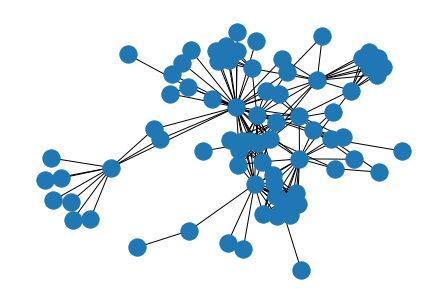

In [ ]:
nx.draw(lesmis, positions)

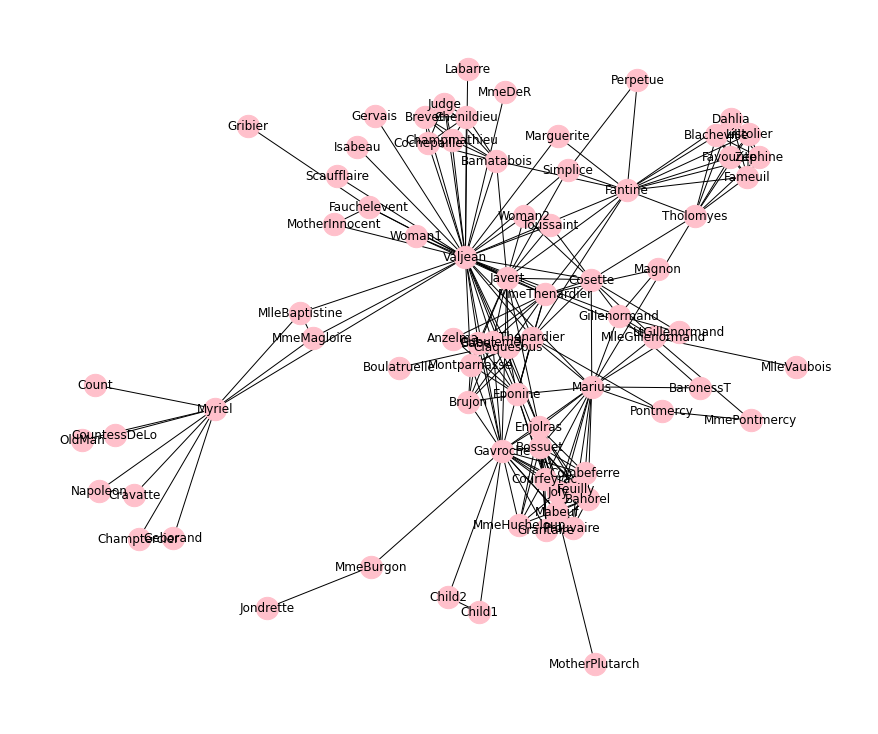

In [ ]:
plt.figure(figsize=(12, 10))
nx.draw(lesmis, positions, node_color = "pink", node_size = 500, with_labels = True)

Transformando o grafo em uma rede sem direção e sem auto-loops.

In [ ]:
lesmis = lesmis.to_undirected() 
lesmis.remove_edges_from(nx.selfloop_edges(lesmis))

Selecionando apenas o maior componente conectado:

In [ ]:
list(nx.connected_components(lesmis))

[{'Anzelma',
  'Babet',
  'Bahorel',
  'Bamatabois',
  'BaronessT',
  'Blacheville',
  'Bossuet',
  'Boulatruelle',
  'Brevet',
  'Brujon',
  'Champmathieu',
  'Champtercier',
  'Chenildieu',
  'Child1',
  'Child2',
  'Claquesous',
  'Cochepaille',
  'Combeferre',
  'Cosette',
  'Count',
  'CountessDeLo',
  'Courfeyrac',
  'Cravatte',
  'Dahlia',
  'Enjolras',
  'Eponine',
  'Fameuil',
  'Fantine',
  'Fauchelevent',
  'Favourite',
  'Feuilly',
  'Gavroche',
  'Geborand',
  'Gervais',
  'Gillenormand',
  'Grantaire',
  'Gribier',
  'Gueulemer',
  'Isabeau',
  'Javert',
  'Joly',
  'Jondrette',
  'Judge',
  'Labarre',
  'Listolier',
  'LtGillenormand',
  'Mabeuf',
  'Magnon',
  'Marguerite',
  'Marius',
  'MlleBaptistine',
  'MlleGillenormand',
  'MlleVaubois',
  'MmeBurgon',
  'MmeDeR',
  'MmeHucheloup',
  'MmeMagloire',
  'MmePontmercy',
  'MmeThenardier',
  'Montparnasse',
  'MotherInnocent',
  'MotherPlutarch',
  'Myriel',
  'Napoleon',
  'OldMan',
  'Perpetue',
  'Pontmercy',
  'Pro

In [ ]:
lesmis_cc = sorted(nx.connected_components(lesmis), key = len, reverse = True)

In [ ]:
lesmis = lesmis.subgraph(lesmis_cc[0])

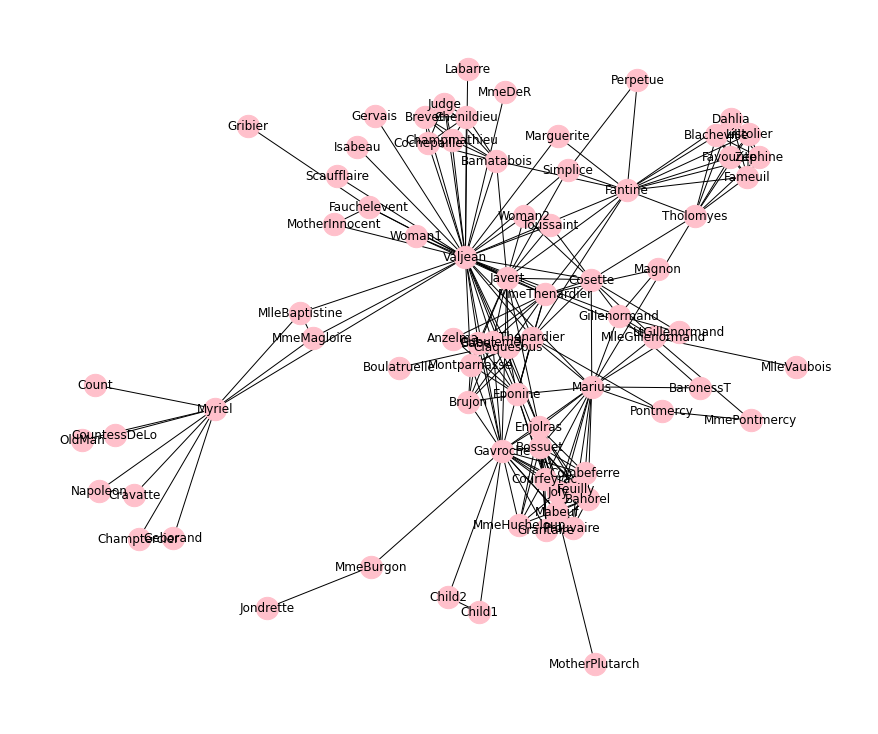

In [ ]:
plt.figure(figsize=(12, 10))
nx.draw(lesmis, positions, node_color = "pink", node_size = 500, with_labels = True)

Transformando os labels para números inteiros, começando com 0:

In [ ]:
lesmis = nx.convert_node_labels_to_integers(lesmis, first_label = 0)

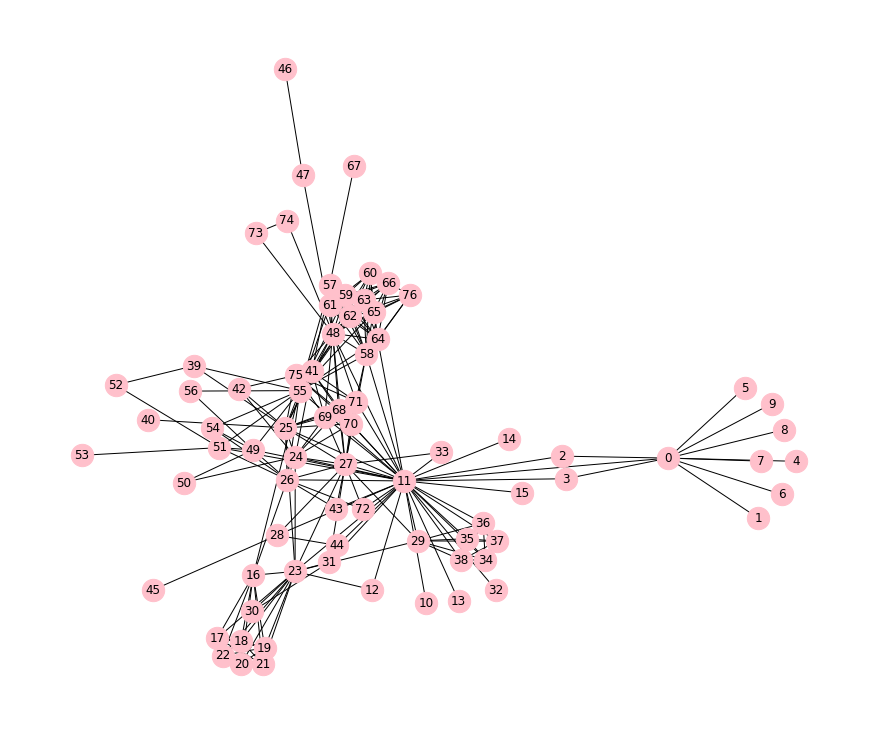

In [ ]:
plt.figure(figsize=(12, 10))
nx.draw(lesmis, node_color = "pink", node_size = 500, with_labels = True)

Número de Vértices e Arestas:

In [ ]:
len(lesmis)

77

In [ ]:
from networkx.classes.function import number_of_nodes
number_of_nodes(lesmis)

77

In [ ]:
from networkx.classes.function import number_of_edges
number_of_edges(lesmis)

254

# Medidas de Conectividade

In [ ]:
lesmis_degree = list(lesmis.degree)
print(lesmis_degree)
print('Tamanho rede lesmis:', len(lesmis_degree), 'vértices')

[(0, 10), (1, 1), (2, 3), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 36), (12, 2), (13, 1), (14, 1), (15, 1), (16, 9), (17, 7), (18, 7), (19, 7), (20, 7), (21, 7), (22, 7), (23, 15), (24, 11), (25, 16), (26, 11), (27, 17), (28, 4), (29, 8), (30, 2), (31, 4), (32, 1), (33, 2), (34, 6), (35, 6), (36, 6), (37, 6), (38, 6), (39, 3), (40, 1), (41, 11), (42, 3), (43, 3), (44, 2), (45, 1), (46, 1), (47, 2), (48, 22), (49, 7), (50, 2), (51, 7), (52, 2), (53, 1), (54, 4), (55, 19), (56, 2), (57, 11), (58, 15), (59, 11), (60, 9), (61, 11), (62, 13), (63, 12), (64, 13), (65, 12), (66, 10), (67, 1), (68, 10), (69, 10), (70, 10), (71, 9), (72, 3), (73, 2), (74, 2), (75, 7), (76, 7)]
Tamanho rede lesmis: 77 vértices


In [ ]:
v = 0
print('Grau do vértice', v, ':', lesmis_degree[v][1])

Grau do vértice 0 : 10


In [ ]:
# Grau médio
media = 0

for i in range(len(lesmis)):
  media += lesmis_degree[i][1]
media = media/len(lesmis)

print('Grau médio:', media)

Grau médio: 6.597402597402597


Convertendo para um dicionário Python > vetor numpy para facilitar manipulação

In [ ]:
vk = dict(lesmis.degree()).values()
print(vk)

dict_values([10, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 36, 2, 1, 1, 1, 9, 7, 7, 7, 7, 7, 7, 15, 11, 16, 11, 17, 4, 8, 2, 4, 1, 2, 6, 6, 6, 6, 6, 3, 1, 11, 3, 3, 2, 1, 1, 2, 22, 7, 2, 7, 2, 1, 4, 19, 2, 11, 15, 11, 9, 11, 13, 12, 13, 12, 10, 1, 10, 10, 10, 9, 3, 2, 2, 7, 7])


In [ ]:
vk = np.array(list(vk))
print('Grau:', vk)

Grau: [10  1  3  3  1  1  1  1  1  1  1 36  2  1  1  1  9  7  7  7  7  7  7 15
 11 16 11 17  4  8  2  4  1  2  6  6  6  6  6  3  1 11  3  3  2  1  1  2
 22  7  2  7  2  1  4 19  2 11 15 11  9 11 13 12 13 12 10  1 10 10 10  9
  3  2  2  7  7]


In [ ]:
# Grau médio
print('Grau médio da rede:', mean(vk))

Grau médio da rede: 6.597402597402597


In [ ]:
list(G.degree)

[(1, 0), (3, 0), ('spam', 0)]

In [ ]:
# Momentos
def momento(G, m):
  M = 0
  for i in G.nodes:
    M += G.degree(i)**m
  M = M/len(G)
  return M

In [ ]:
for k in range(1, 5):
  print('Momento número', k, ':', momento(lesmis, k))

Momento número 1 : 6.597402597402597
Momento número 2 : 79.53246753246754
Momento número 3 : 1408.025974025974
Momento número 4 : 33592.72727272727


In [ ]:
print('Variância:', np.var(vk))
print('Mediana:', np.median(vk))

Variância: 36.006746500253
Mediana: 6.0


Distribuição do grau:

In [ ]:
def distr_grau(G):
  vk = dict(G.degree())
  vk = list(vk.values())
  vk = np.array(vk)
  maxk = np.max(vk)
  mink = np.min(vk)

  kvalues = np.arange(0, maxk + 1) 
  Pk = np.zeros(maxk + 1)

  for k in vk:
    Pk[k] += 1
  Pk = Pk/sum(Pk)

  return kvalues, Pk

In [ ]:
ks, Pk = distr_grau(lesmis)

Text(0.5, 1.0, 'Distribuição grau')

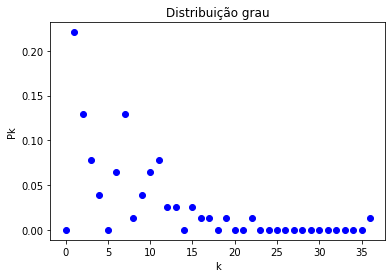

In [ ]:
plt.plot(ks, Pk, 'bo')
plt.xlabel('k')
plt.ylabel('Pk')
plt.title('Distribuição grau')

Text(0.5, 1.0, 'Distribuição grau')

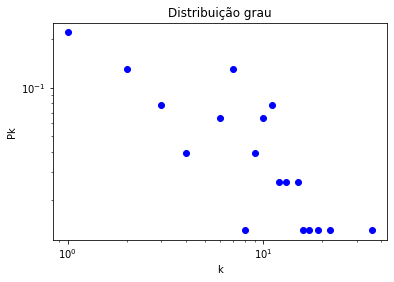

In [ ]:
plt.xscale('log')
plt.yscale('log')
plt.plot(ks, Pk, 'bo')
plt.xlabel('k')
plt.ylabel('Pk')
plt.title('Distribuição grau')

Momentos da Distribuição do grau

In [ ]:
def momento_distr_grau(G, m):
  k, Pk = distr_grau(G)
  M = sum((k**m)*Pk)
  return M

In [ ]:
for m in range(1, 4):
  print('Momento', m, 'da distribuição de grau:', momento_distr_grau(lesmis, m))

Momento 1 da distribuição de grau: 6.5974025974025965
Momento 2 da distribuição de grau: 79.53246753246754
Momento 3 da distribuição de grau: 1408.025974025974


Entropia de Shannon

Nível de heterogeneidade das conexões:

In [ ]:
def H_shannon(G):
  k, Pk = distr_grau(G)
  H = 0
  for p in Pk:
    if (p > 0):
      H -= p*math.log(p, 2)
  return H

In [ ]:
print('Entropia de Shannon:', H_shannon(lesmis))
print('Entropia de Shannon:', "%3.4f"%H_shannon(lesmis))

Entropia de Shannon: 3.5956951619824657
Entropia de Shannon: 3.5957


In [ ]:
# H normalizada: H/Hmax, Hmax = logN
def H_shannon_norm(G):
  k, Pk = distr_grau(G)
  H = 0
  for p in Pk:
    if (p > 0):
      H -= p*math.log(p, 2)
  return H/math.log(len(G), 2)

In [ ]:
print('Entropia de Shannon normalizada:', "%3.4f"%H_shannon_norm(lesmis))

Entropia de Shannon normalizada: 0.5738


Transitividade
Ocorrência de triângulos

In [ ]:
print('Transitividade', "%3.4f"%nx.transitivity(lesmis))
print('Clustering médio:', "%3.4f"%nx.average_clustering(lesmis))

Transitividade 0.4989
Clustering médio: 0.5731


# Questionário

### **1)** Para a rede do livro "Os miseráveis" (base lesmis), calcule o terceiro e quarto momento do grau.

In [ ]:
print('Terceiro momento do grau:', momento(lesmis, 3))
print('Quarto momento do grau:', momento(lesmis, 4))

Terceiro momento do grau: 1408.025974025974
Quarto momento do grau: 33592.72727272727


### **2)** Qual o valor da complexidade para a rede de energia elétrica dos EUA (base powergrid)?

In [ ]:
def coef_complexidade(G):
  alpha = momento(G, 2)/momento(G, 1)
  return alpha

In [ ]:
powergrid = nx.read_edgelist("/content/powergrid.txt")

In [ ]:
print('Número de vértices:', powergrid.number_of_nodes())
print('Número de conexões:', powergrid.number_of_edges())

Número de vértices: 4941
Número de conexões: 6594


In [ ]:
print('Complexidade:', "%3.4f"%coef_complexidade(powergrid))

Complexidade: 3.8712


### **3)** Calcule a entropia de Shannon para a base de estradas da Europa (base euroroad).

In [ ]:
euroroad = nx.read_edgelist("/content/euroroad.txt", create_using=nx.DiGraph(), nodetype = int) 

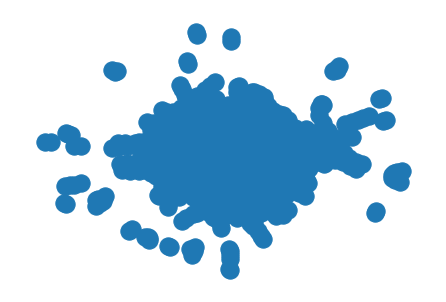

In [ ]:
nx.draw(euroroad)

In [ ]:
#nx.info(euroroad)
print('Número de vértices:', euroroad.number_of_nodes())
print('Número de conexões:', euroroad.number_of_edges())

Número de vértices: 1174
Número de conexões: 1417


In [ ]:
print('Entropia de Shannon:', H_shannon(euroroad))

Entropia de Shannon: 2.0033103874527756


### **4)** Calcule as medidas de transitivity e average clustering coefficient para a base de dados de aeroportos dos EUA (base usairport)

In [ ]:
#usairport = nx.read_edgelist("/content/usairport.txt") #3 colunas!

In [ ]:
with open("/content/usairport.txt") as f:
  usairport = nx.Graph([line.split()[:2] for line in f])

In [ ]:
print('Número de vértices:', usairport.number_of_nodes())
print('Número de conexões:', usairport.number_of_edges())

Número de vértices: 1574
Número de conexões: 17215


In [ ]:
print('Transitividade:', nx.transitivity(usairport))

Transitividade: 0.38414344664491556


In [ ]:
print('Average clustering coefficient:', nx.average_clustering(usairport))

Average clustering coefficient: 0.5041525392095769


### **5)** Calcule o coeficiente de complexidade e a entropia de Shannon para a rede de aeroportos dos EUA (base usairport)

In [ ]:
print('Entropia de Shannon:', H_shannon(usairport))

Entropia de Shannon: 4.985977646539227


In [ ]:
print('Complexidade:', coef_complexidade(usairport))

Complexidade: 112.22224803950043


# Tutorial: NetworkX

In [ ]:
G = nx.Graph()

### Nodes

In [ ]:
G.add_node(1)

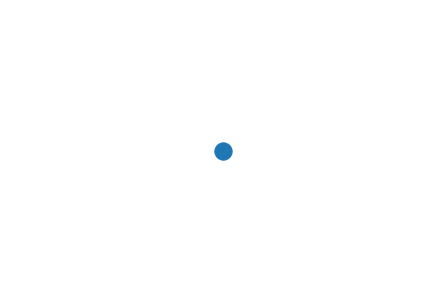

In [ ]:
nx.draw(G)

In [ ]:
G.add_nodes_from([2, 3])

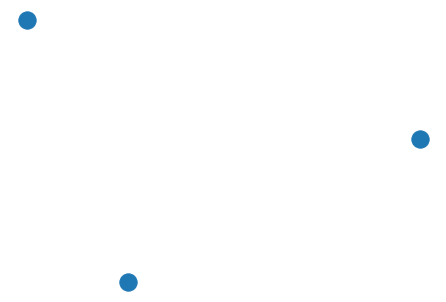

In [ ]:
nx.draw(G)

In [ ]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
    (6, {"color": "pink"})
])

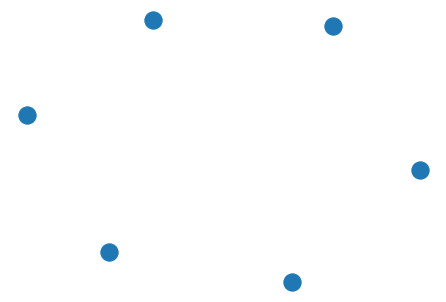

In [ ]:
nx.draw(G)

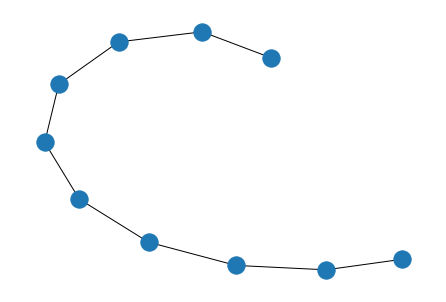

In [ ]:
H = nx.path_graph(10)
nx.draw(H)

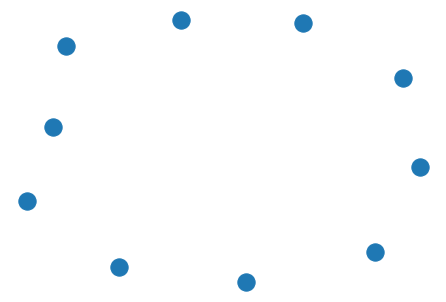

In [ ]:
G.add_nodes_from(H) #Nodes from one graph can be incorporated into another
nx.draw(G)

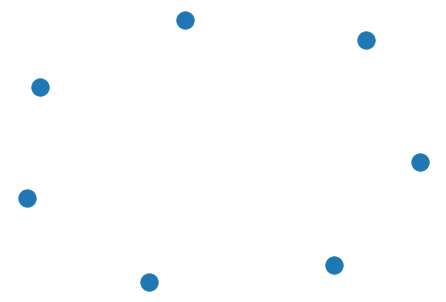

In [ ]:
G.add_node(H) #the graph H as a node in G
nx.draw(G)

### Edges

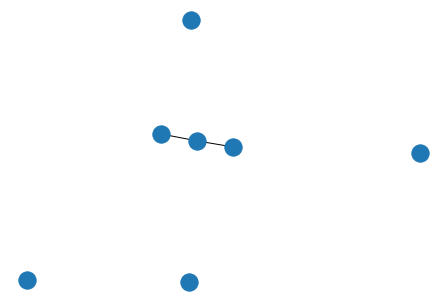

In [ ]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
nx.draw(G)

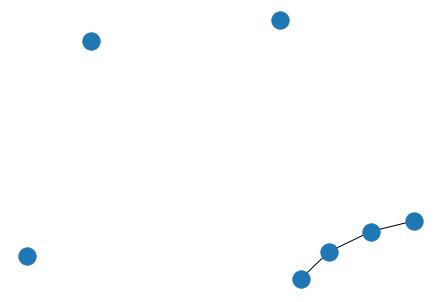

In [ ]:
G.add_edge(1, H)
nx.draw(G)

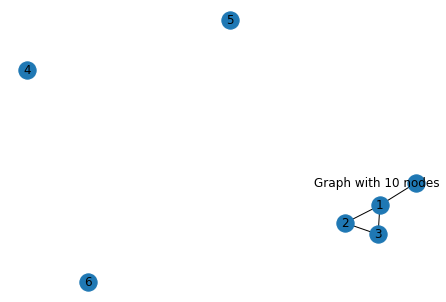

In [ ]:
G.add_edges_from([(1, 2), (1, 3)])
nx.draw(G, with_labels = True)

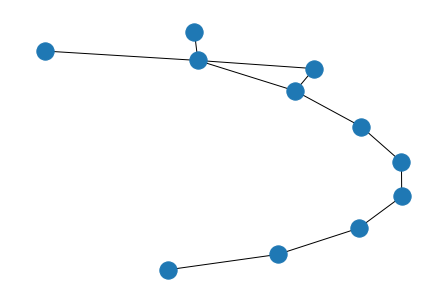

In [ ]:
G.add_edges_from(H.edges)
nx.draw(G)

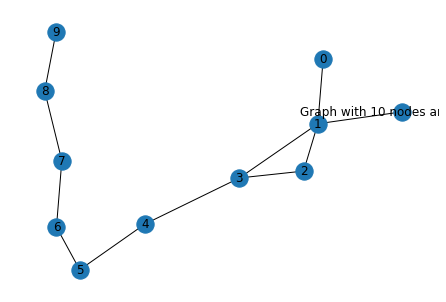

In [ ]:
nx.draw(G, with_labels = True)

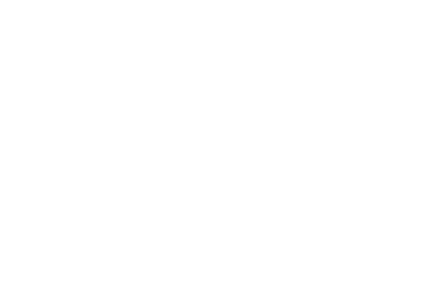

In [ ]:
G.clear()
nx.draw(G)

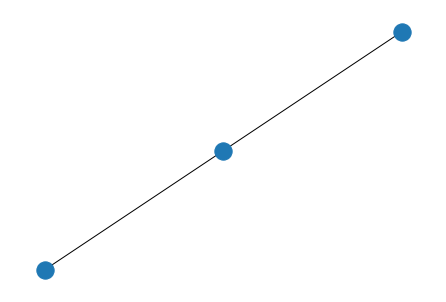

In [ ]:
G.add_edges_from([(1, 2), (1, 3)])
nx.draw(G)

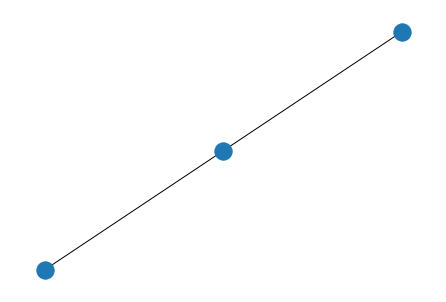

In [ ]:
G.add_node(1)
nx.draw(G)

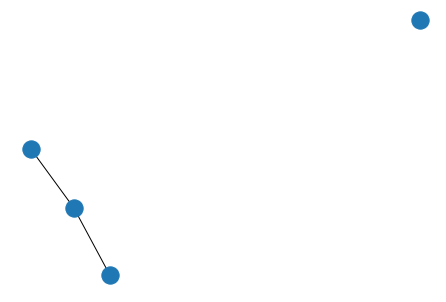

In [ ]:
G.add_node("spam")
nx.draw(G)

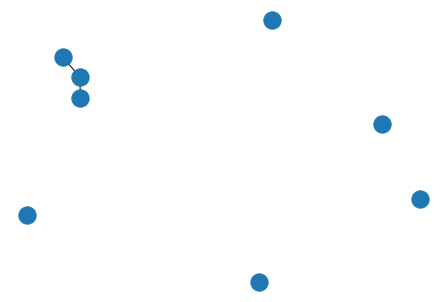

In [ ]:
G.add_nodes_from("spam")
nx.draw(G)

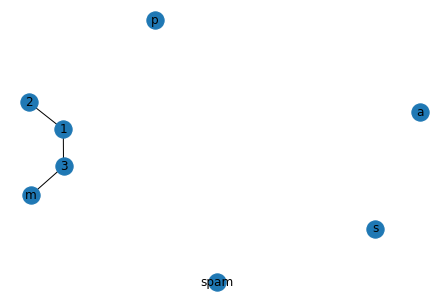

In [ ]:
G.add_edge(3, 'm')
nx.draw(G, with_labels = True)

In [ ]:
G.number_of_nodes()

8

In [ ]:
G.number_of_edges()

3

In [ ]:
G.adj #Obs: the order of adjacency reporting is the order of edge addition

AdjacencyView({1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}, 'm': {}}, 'spam': {}, 's': {}, 'p': {}, 'a': {}, 'm': {3: {}}})

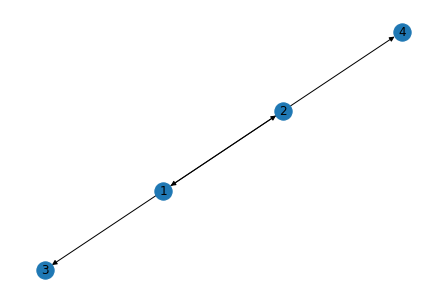

In [ ]:
DG = nx.DiGraph() #Directed Graph
DG.add_edge(2, 1)
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
nx.draw(DG, with_labels = True)

In [ ]:
DG.adj

AdjacencyView({2: {1: {}, 4: {}}, 1: {3: {}, 2: {}}, 3: {}, 4: {}})

In [ ]:
DG.successors

<bound method DiGraph.successors of <networkx.classes.digraph.DiGraph object at 0x7fe4a110ddf0>>

In [ ]:
DG.predecessors

<bound method DiGraph.predecessors of <networkx.classes.digraph.DiGraph object at 0x7fe4a110ddf0>>

In [ ]:
assert list(DG.successors(2)) == [1, 4]

In [ ]:
DG.edges

OutEdgeView([(2, 1), (2, 4), (1, 3), (1, 2)])

In [ ]:
DG.successors

<bound method DiGraph.successors of <networkx.classes.digraph.DiGraph object at 0x7fe4a110ddf0>>

### Examining elements of a graph

In [ ]:
G.nodes

NodeView((1, 2, 3, 'spam', 's', 'p', 'a', 'm'))

In [ ]:
G.edges

EdgeView([(1, 2), (1, 3), (3, 'm')])

In [ ]:
G.adj

AdjacencyView({1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}, 'm': {}}, 'spam': {}, 's': {}, 'p': {}, 'a': {}, 'm': {3: {}}})

In [ ]:
G.degree

DegreeView({1: 2, 2: 1, 3: 2, 'spam': 0, 's': 0, 'p': 0, 'a': 0, 'm': 1})

In [ ]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [ ]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [ ]:
list(G.adj[1])

[2, 3]

In [ ]:
list(G.adj['m'])

[3]

In [ ]:
G.degree[1]

2

### Removing elements

In [ ]:
G.remove_node(2)

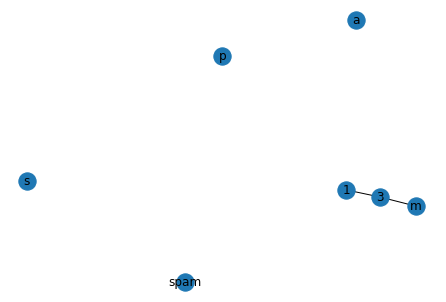

In [ ]:
nx.draw(G, with_labels = True)

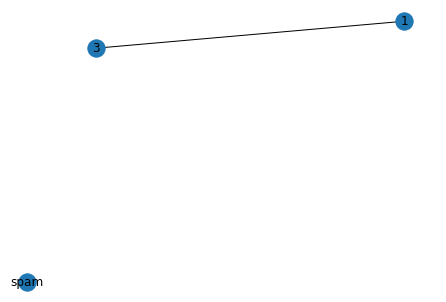

In [ ]:
G.remove_nodes_from("spam")
nx.draw(G, with_labels = True)

In [ ]:
list(G.nodes)

[1, 3, 'spam']

In [ ]:
list(G.edges)

[(1, 3)]

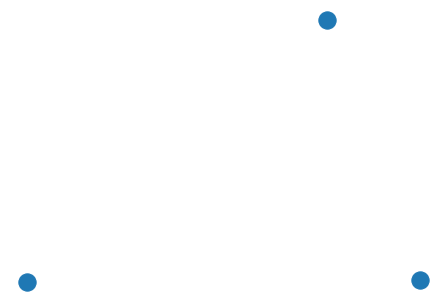

In [ ]:
G.remove_edge(1, 3)
list(G.edges)
nx.draw(G)

### Stochastic graph generator

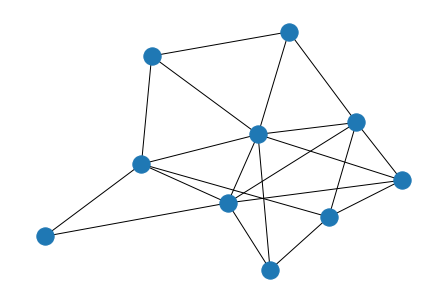

In [ ]:
# Erdős-Rényi graph (binomial graph)
erdos = nx.erdos_renyi_graph(10, 0.5) #nodes, p #(n, p[, seed, directed])
nx.draw(erdos)

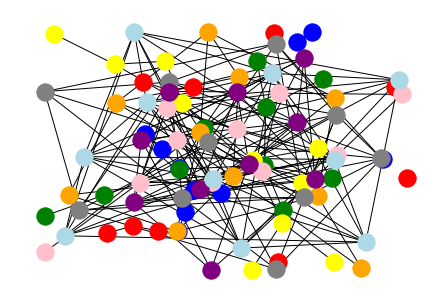

In [ ]:
color = ["red", "blue", "green", "yellow", "pink", "orange", "gray", "purple", "lightblue", "lightgreen"]
er = []

for p in range (1, 10):
  er.append(nx.erdos_renyi_graph(10, p/10))

for p in range(0, 9):
  nx.draw(er[p], node_color = color[p])

In [ ]:
color

['red',
 'blue',
 'green',
 'yellow',
 'pink',
 'orange',
 'gray',
 'purple',
 'lightblue',
 'lightgreen']

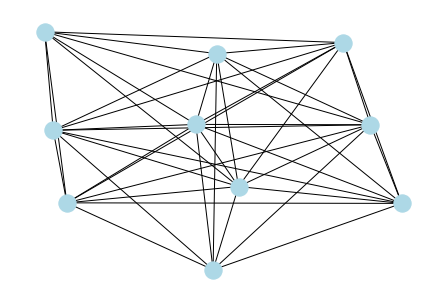

In [ ]:
p = 8
nx.draw(er[p], node_color = color[p])

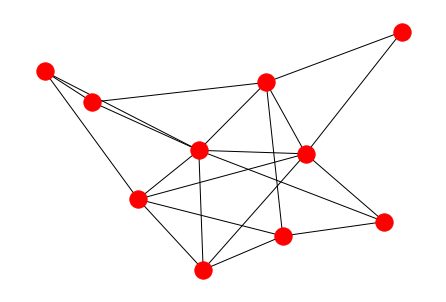

In [ ]:
nx.draw(erdos, node_color = "red")

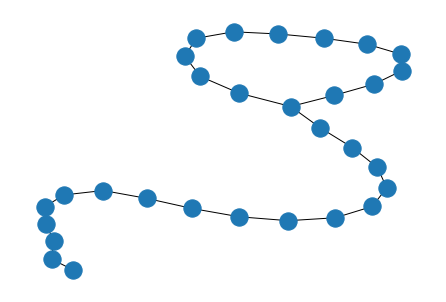

In [ ]:
# Watts–Strogatz small-world graph
ws = nx.watts_strogatz_graph(30, 3, 0.1) #(n, k, p[, seed]) Returns a Watts–Strogatz small-world graph.
nx.draw(ws)

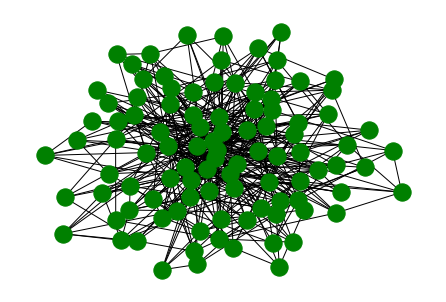

In [ ]:
# Random graph using Barabási–Albert preferential attachment
ba = nx.barabasi_albert_graph(100, 5)
nx.draw(ba, node_color = "green")

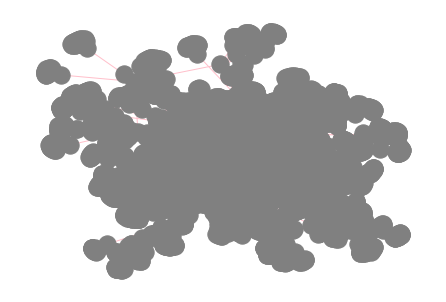

In [ ]:
# Random lobster graph
red = nx.random_lobster(20, 0.9, 0.9)
nx.draw(red, node_color = "gray", edge_color = "pink")